<a href="https://colab.research.google.com/github/tikendraw/SkimLit_Research_paper_model/blob/main/SkimLit_Research_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2: SkimLit 📄🔥

In the previous notebook ([NLP fundamentals in TensorFlow](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb)), we went through some fundamental natural lanuage processing concepts. The main ones being **tokenzation** (turning words into numbers) and **creating embeddings** (creating a numerical representation of words).

In this project, we're going to be putting what we've learned into practice.

More specificially, we're going to be replicating the deep learning model behind the 2017 paper [*PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071).

When it was released, the paper presented a new dataset called PubMed 200k RCT which consists of ~200,000 labelled Randomized Controlled Trial (RCT) abstracts.

The goal of the dataset was to explore the ability for NLP models to classify sentences which appear in sequential order.

In other words, given the abstract of a RCT, what role does each sentence serve in the abstract?

![Skimlit example inputs and outputs](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-skimlit-overview-input-and-output.png)

*Example inputs ([harder to read abstract from PubMed](https://pubmed.ncbi.nlm.nih.gov/28942748/)) and outputs ([easier to read abstract](https://pubmed.ncbi.nlm.nih.gov/32537182/)) of the model we're going to build. The model will take an abstract wall of text and predict the section label each sentence should have.*  

### Model Input

For example, can we train an NLP model which takes the following input (note: the following sample has had all numerical symbols replaced with "@"):

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Model output

And returns the following output:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

### Problem in a sentence

The number of RCT papers released is continuing to increase, those without structured abstracts can be hard to read and in turn slow down researchers moving through the literature. 

### Solution in a sentence

Create an NLP model to classify abstract sentences into the role they play (e.g. objective, methods, results, etc)  to enable researchers to skim through the literature (hence SkimLit 🤓🔥) and dive deeper when necessary.

> 📖 **Resources:** Before going through the code in this notebook, you might want to get a background of what we're going to be doing. To do so, spend an hour (or two) going through the following papers and then return to this notebook:
1. Where our data is coming from: [*PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071)
2. Where our model is coming from: [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

## What we're going to cover

Time to take what we've learned in the NLP fundmentals notebook and build our biggest NLP model yet:

* Downloading a text dataset ([PubMed RCT200k from GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct))
* Writing a preprocessing function to prepare our data for modelling
* Setting up a series of modelling experiments
  * Making a baseline (TF-IDF classifier)
  * Deep models with different combinations of: token embeddings, character embeddings, pretrained embeddings, positional embeddings
* Building our first multimodal model (taking multiple types of data inputs)
  * Replicating the model architecture from https://arxiv.org/pdf/1612.05251.pdf 
* Find the most wrong predictions
* Making predictions on PubMed abstracts from the wild



In [2]:
import tensorflow as tf
from tensorflow import keras

# Get the Data

In [3]:
import os

if os.path.exists('pubmed-rct'):
    pass
else:
    # clone the data repo
    ! git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

! ls pubmed-rct


PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [4]:
# os.system('rm -rf pubmed-rct')

Checking the contents of the downloaded repository, you can see there are four folders.

Each contains a different version of the PubMed 200k RCT dataset.

Looking at the [README file](https://github.com/Franck-Dernoncourt/pubmed-rct) from the GitHub page, we get the following information:
* PubMed 20k is a subset of PubMed 200k. I.e., any abstract present in PubMed 20k is also present in PubMed 200k.
* `PubMed_200k_RCT` is the same as `PubMed_200k_RCT_numbers_replaced_with_at_sign`, except that in the latter all numbers had been replaced by `@`. (same for `PubMed_20k_RCT` vs. `PubMed_20k_RCT_numbers_replaced_with_at_sign`).
* Since Github file size limit is 100 MiB, we had to compress `PubMed_200k_RCT\train.7z` and `PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip`. To uncompress `train.7z`, you may use 7-Zip on Windows, Keka on Mac OS X, or p7zip on Linux.

To begin with, the dataset we're going to be focused on is `PubMed_20k_RCT_numbers_replaced_with_at_sign`.

Why this one?

Rather than working with the whole 200k dataset, we'll keep our experiments quick by starting with a smaller subset. We could've chosen the dataset with numbers instead of having them replaced with `@` but we didn't.

In [5]:
! ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


Beautiful, looks like we've got three separate text files:
* `train.txt` - training samples.
* `dev.txt` - dev is short for development set, which is another name for validation set (in our case, we'll be using and referring to this file as our validation set).
* `test.txt` - test samples.

To save ourselves typing out the filepath to our target directory each time, let's turn it into a variable.

In [6]:
data_dir = 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [7]:
# Check all of the filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

# Preprocess the DATA

1. Read the File
2. Clean it 
3. Parse into a Dataframe

In [8]:
# read the file
def read_file(filename:str, read_binary = False) -> list:
    '''
    Args:
        filename: str = path to the file

        Read_binary: bool  = True if want to read binary files

    Returns:
        list of all the lines in the file 

    '''
    if read_binary:
        read_as = 'rb'
    else:
        read_as = 'r'


    with open(filename, read_as) as f:
        return f.readlines()
        

In [9]:
train_raw  = read_file(data_dir+'train.txt')

In [10]:
len(train_raw)

210040

In [11]:
train_raw[:15]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [12]:
# Now we can just combine all the individual function in single main function

def preprocess(filename:str) -> list:
    #reading the file
    temp1 = read_file(filename)

    # creating list of paragraphs

    big_list = []                        # big list to append paragraphs as list
    temp = []                            # temp list to collect paragraphs

    for i in temp1:
        if i !='\n':                    # append is not '\n' because paragraphs as separable with it
            if i.startswith('###'):     # if starts with ### skip it , doesnot contain info for your evaluation, it is just for count of para
                continue
            else:
                temp.append(i)          # append single lines
        elif i == '\n':
            big_list.append(temp)       # is \n comes then apped the temp para because its end of the para
            temp = []                   # clear the temp

    preprocessed = []                   # list of dictionary with values as text label, line, number etc

    for para in  big_list:              # iterating over list of paragraphs
        for line_number, line in enumerate(para):   # iterating over lines in paragraph
            splits = line.split('\t')
            if len(splits) <2:
                pass
            else:
                preprocessed.append({'line_number': line_number+1,
                                    'text': splits[1].strip('\n'),
                                    'label': splits[0],
                                    'total_lines': len(para) })
                
    return preprocessed
        

In [13]:
val_data = preprocess(data_dir+'dev.txt')
train_data = preprocess(data_dir+'train.txt')
test_data = preprocess(data_dir+'test.txt')

In [14]:
#creating pandas dataframe
import pandas as pd
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
val_df = pd.DataFrame(val_data)
train_df.head()

,line_number,text,label,total_lines
0,1,To investigate the efficacy of @ weeks of dail...,OBJECTIVE,12
1,2,A total of @ patients with primary knee OA wer...,METHODS,12
2,3,Outcome measures included pain reduction and i...,METHODS,12
3,4,Pain was assessed using the visual analog pain...,METHODS,12
4,5,Secondary outcome measures included the Wester...,METHODS,12


# Dataset Analysis

### value counts of the labels




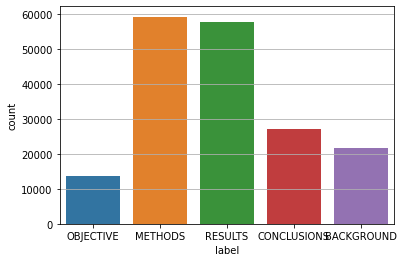

In [15]:
# value counts of the labels
import seaborn as sns
import matplotlib.pyplot as plt

# countplot of the label values
plt.grid(True)
sns.countplot(x = 'label', data= train_df)

### distribution of sentence length


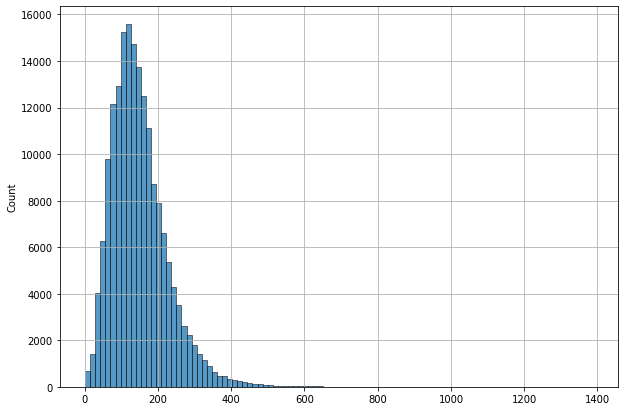

In [16]:
# distribution of sentence length
plt.figure( figsize = (10,7))
plt.grid(True)
sns.histplot(x = [len(x) for x in train_df.text], bins = 100)

### Words per sentence

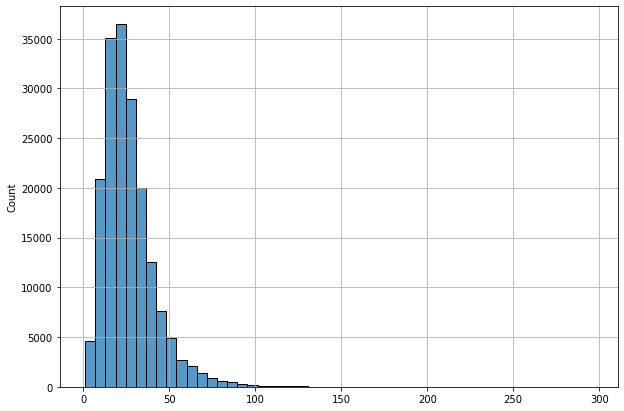

In [17]:
# words per sentences
plt.figure( figsize = (10,7))
plt.grid(True)
sns.histplot(x = [len(i.split(' ')) for i in train_df.text], bins = 50)

In [18]:
# How long of a sentence covers 95% of the lengths?

all_words_len = [len(i.split()) for i in train_df.text]

import numpy as np
output_seq_len = int(np.percentile(all_words_len, 95))
output_seq_len


55

## Make numeric labels (ML models require numeric labels)

We're going to create one hot and label encoded labels.

We could get away with just making label encoded labels, however, TensorFlow's CategoricalCrossentropy loss function likes to have one hot encoded labels (this will enable us to use label smoothing later on).

To numerically encode labels we'll use Scikit-Learn's [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) classes.

In [19]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_hot_encoder = OneHotEncoder(sparse=False, dtype = 'int32')
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["label"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["label"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["label"].to_numpy().reshape(-1, 1))

# Check what training labels look like
# train_labels_one_hot.dtype('int16')
train_labels_one_hot.dtype

dtype('int32')

Now we've trained an instance of `LabelEncoder`, we can get the class names and number of classes using the `classes_` attribute.

In [20]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["label"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["label"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["label"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [21]:

# Get class names and number of classes from LabelEncoder instance 
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Get the DATAset ready to be fitted

In [22]:
xtrain = train_df.drop('label', axis = 1)
xtest = test_df.drop('label', axis = 1)
xval = val_df.drop('label', axis = 1)

xtrain.head()

,line_number,text,total_lines
0,1,To investigate the efficacy of @ weeks of dail...,12
1,2,A total of @ patients with primary knee OA wer...,12
2,3,Outcome measures included pain reduction and i...,12
3,4,Pain was assessed using the visual analog pain...,12
4,5,Secondary outcome measures included the Wester...,12


In [23]:
train_sentences = train_df.text.to_list()
test_sentences = test_df.text.to_list()
val_sentences = val_df.text.to_list()


### Helper function

In [24]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [25]:
def create_tensorboard_callback(dir_name, experiment_name):
    import datetime
    """
    Creates a TensorBoard callback instand to store log files.
    Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
    Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
    """
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir
    )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback


# Creating a series of model experiments

We've proprocessed our data so now, in true machine learning fashion, it's time to setup a series of modelling experiments.

We'll start by creating a simple baseline model to obtain a score we'll try to beat by building more and more complex models as we move towards replicating the sequence model outlined in [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

For each model, we'll train it on the training data and evaluate it on the validation data.

## Model 0: Getting a baseline 

Our first model we'll be a TF-IDF Multinomial Naive Bayes as recommended by [Scikit-Learn's machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

To build it, we'll create a Scikit-Learn `Pipeline` which uses the [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class to convert our abstract sentences to numbers using the TF-IDF (term frequency-inverse document frequecy) algorithm and then learns to classify our sentences using the [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) aglorithm.

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [27]:
model0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

#fit model
model0.fit(train_sentences,train_labels_encoded )

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
# Evaluate baseline on validation dataset
model0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [29]:
# Make predictions
pred0 = model0.predict(val_sentences)
pred0

array([4, 1, 3, ..., 4, 4, 1])

In [30]:
model0_result = calculate_results(val_labels_encoded, pred0)
model0_result

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

In [31]:
# create a sheet to append the metrics
scoresheet = {}

scoresheet['naive_bayes (baseline)'] = model0_result

## Model 1: 1D Conv with Token Embedding

In [32]:
from tensorflow.keras.layers import TextVectorization, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras import layers

We'll keep all the parameters default except for `max_tokens` (the number of unique words in our dataset) and `output_sequence_length` (our desired output length for each vectorized sentence).

Section 3.2 of the [PubMed 200k RCT paper](https://arxiv.org/pdf/1710.06071.pdf) states the vocabulary size of the PubMed 20k dataset as 68,000. So we'll use that as our `max_tokens` parameter.

In [33]:
max_tokens = 68000

from typing import Text
text_vectorizer = TextVectorization(max_tokens = max_tokens, pad_to_max_tokens=True,output_sequence_length=output_seq_len)


In [34]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [35]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
Nicotine replacement therapy remains a core part of the pharmacological approach to smoking cessation .

Length of text: 15

Vectorized text:
[[1873 1075   66  876    8 1595  732    4    2 2455  453    6  425  926
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [36]:
# how many words are there
total_words =  len(text_vectorizer.get_vocabulary())
print('total no. of words: ', total_words)
print('5 Most frequent words', text_vectorizer.get_vocabulary()[:5])
print('5 Least frequent words', text_vectorizer.get_vocabulary()[-5:])

total no. of words:  64841
5 Most frequent words ['', '[UNK]', 'the', 'and', 'of']
5 Least frequent words ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


### Embedding the text

In [37]:
# embedding the text

embed = layers.Embedding(input_dim =  total_words,
                         output_dim = 128, 
                         mask_zero = True)


In [38]:
print('sentence: ', target_sentence ,end = '\n')
print('\n')
vectorized_sentence = text_vectorizer([target_sentence])
print('vectorized: ', vectorized_sentence)
print('\n')
embedded_sentence = embed(vectorized_sentence)
print('embedded: ', embedded_sentence)
print('embedded shape', embedded_sentence.shape)

sentence:  Nicotine replacement therapy remains a core part of the pharmacological approach to smoking cessation .


vectorized:  tf.Tensor(
[[1873 1075   66  876    8 1595  732    4    2 2455  453    6  425  926
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 55), dtype=int64)


embedded:  tf.Tensor(
[[[-0.01008628 -0.03355091  0.03320647 ...  0.02670093 -0.02574406
    0.03402143]
  [ 0.00244587 -0.00284211  0.03282021 ...  0.03859298 -0.04670619
    0.02121248]
  [ 0.00399563  0.02711446 -0.0321432  ...  0.02345427 -0.04940009
   -0.03067193]
  ...
  [ 0.04002691 -0.02751815  0.00506971 ...  0.00428549 -0.01961877
    0.02775857]
  [ 0.04002691 -0.02751815  0.00506971 ...  0.00428549 -0.01961877
    0.02775857]
  [ 0.04002691 -0.02751815  0.00506971 ...  0.00428549 -0.01961877
    0.02775857]]], shape=(1, 55, 

### creating Dataset 

In [39]:
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [40]:
train_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
val_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))



In [41]:
# tuning for  performance and creating batches
train_data = train_data.batch(64).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(64).prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(64).prefetch(tf.data.AUTOTUNE)

print(train_data)
print(val_data)
print(test_data)

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.int32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.int32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.int32, name=None))>


## Model 1: Conv1D with token embeddings

Alright, we've now got a way to numerically represent our text and labels, time to build a series of deep models to try and improve upon our baseline.

All of our deep models will follow a similar structure:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

The main component we'll be changing throughout is the `Layers` component. Because any modern deep NLP model requires text to be converted into an embedding before meaningful patterns can be discovered within.

The first model we're going to build is a 1-dimensional Convolutional Neural Network. 

We're also going to be following the standard machine learning workflow of:
- Build model
- Train model
- Evaluate model (make predictions and compare to ground truth)


In [42]:
inputs = layers.Input(shape=(1,), dtype = 'string')
vect_layer = text_vectorizer(inputs)
embed_layer = embed(vect_layer)
x = layers.Conv1D(64,3,1,padding = 'same',activation = 'relu')(embed_layer)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling1D()(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5, activation = 'softmax')(x)

model1 = keras.Model(inputs = inputs, outputs = outputs)

# compile
model1.compile(loss= 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [43]:
import datetime
tb_dir = 'tb_dir'

In [44]:
model1.summary(
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            24640     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 5)                 325   

In [45]:
history1 = model1.fit(train_data, 
                    steps_per_epoch=int(0.1 * len(train_data)),
                    validation_steps=int(0.1 * len(val_data)),

                      epochs = 5,
                      validation_data = val_data, 
                      callbacks = [create_tensorboard_callback(tb_dir, 'model1_conv1d')])

Saving TensorBoard log files to: tb_dir/model1_conv1d/20220814-133733
Epoch 1/5
281/281 [==============================] - 13s 9ms/step - loss: 0.9525 - accuracy: 0.6395 - val_loss: 0.6422 - val_accuracy: 0.7583
Epoch 2/5
281/281 [==============================] - 2s 9ms/step - loss: 0.6093 - accuracy: 0.7736 - val_loss: 0.5623 - val_accuracy: 0.7932
Epoch 3/5
281/281 [==============================] - 2s 9ms/step - loss: 0.5661 - accuracy: 0.7930 - val_loss: 0.5367 - val_accuracy: 0.8035
Epoch 4/5
281/281 [==============================] - 2s 9ms/step - loss: 0.5376 - accuracy: 0.8042 - val_loss: 0.5253 - val_accuracy: 0.8088
Epoch 5/5
281/281 [==============================] - 2s 9ms/step - loss: 0.5411 - accuracy: 0.8054 - val_loss: 0.5125 - val_accuracy: 0.8068


In [46]:
model1.evaluate(val_data)

473/473 [==============================] - 2s 3ms/step - loss: 0.5122 - accuracy: 0.8107


[0.5122197270393372, 0.8107374310493469]

In [47]:
ypred1 = model1.predict(test_data)
ypred1 = tf.argmax(ypred1, axis = 1)
ypred1

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([2, 2, 2, ..., 4, 4, 4])>

In [48]:
val_labels_encoded.shape, val_labels_one_hot.shape

((30212,), (30212, 5))

In [49]:
# Calculate model_1 results
model1_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=ypred1)
model1_results

{'accuracy': 80.63381450141031,
 'f1': 0.8028831477750222,
 'precision': 0.8077981658431129,
 'recall': 0.8063381450141032}

In [50]:
# appending to scoresheet
scoresheet['Model1 conv1d'] = model1_results

## Model2 : Using Pretrained Embedding layers (USE)

In [51]:
import tensorflow_hub as hub
use_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable= False)


In [52]:
print(target_sentence)
use_embedded_target = use_embedding_layer([target_sentence])
print(f'\n Use Embedded sentence: {use_embedded_target[0][:30]}')
print(f'use embedde layers shape: {use_embedded_target[0].shape}')

Nicotine replacement therapy remains a core part of the pharmacological approach to smoking cessation .

 Use Embedded sentence: [ 0.004405    0.0238886  -0.05475104 -0.02994484 -0.07677314 -0.07724421
  0.06691654 -0.04308327  0.01772416  0.01834977  0.06170713 -0.05186668
  0.02030809  0.01287263 -0.01034251 -0.07159021 -0.07751472  0.02123485
 -0.01505714  0.0598256  -0.06859484  0.03136621 -0.01902691 -0.01752865
 -0.01203507  0.01330113 -0.00573154 -0.0479647   0.01226872  0.01305466]
use embedde layers shape: (512,)


In [53]:
# Model2 building
inputs = layers.Input(shape = [], dtype = 'string')
use_layer = use_embedding_layer(inputs)
outputs = layers.Dense(5, activation = 'softmax')(use_layer)

#
model2 = keras.Model(inputs = inputs, outputs = outputs)

#compile
model2.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [54]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 256,800,389
Trainable params: 2,565
Non-trainable params: 256,797,824
_________________________________________________________________


In [55]:
history2 = model2.fit(train_data, 
                      epochs = 5,
                      steps_per_epoch=int(0.1 * len(train_data)),
                    validation_steps=int(0.1 * len(val_data)),
                      validation_data = val_data, 
                      callbacks = [create_tensorboard_callback(tb_dir, 'model2_USE_layer')])

Saving TensorBoard log files to: tb_dir/model2_USE_layer/20220814-133826
Epoch 1/5
281/281 [==============================] - 8s 18ms/step - loss: 1.3432 - accuracy: 0.5113 - val_loss: 1.1823 - val_accuracy: 0.5672
Epoch 2/5
281/281 [==============================] - 4s 16ms/step - loss: 1.1044 - accuracy: 0.5961 - val_loss: 1.0407 - val_accuracy: 0.6197
Epoch 3/5
281/281 [==============================] - 5s 16ms/step - loss: 1.0072 - accuracy: 0.6322 - val_loss: 0.9643 - val_accuracy: 0.6476
Epoch 4/5
281/281 [==============================] - 5s 18ms/step - loss: 0.9368 - accuracy: 0.6584 - val_loss: 0.9172 - val_accuracy: 0.6666
Epoch 5/5
281/281 [==============================] - 9s 30ms/step - loss: 0.9126 - accuracy: 0.6636 - val_loss: 0.8861 - val_accuracy: 0.6762


In [56]:
model2.evaluate(val_data)

473/473 [==============================] - 9s 19ms/step - loss: 0.8851 - accuracy: 0.6783


[0.8851370811462402, 0.6783066391944885]

In [57]:
ypred2 = model2.predict(test_data)
ypred2 = tf.argmax(ypred2, axis = 1)
ypred2

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 2, 2, ..., 4, 4, 2])>

In [58]:
# Calculate model_1 results
model2_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=ypred2)
model2_results

{'accuracy': 67.53608760577401,
 'f1': 0.6619957797222634,
 'precision': 0.6681252789529378,
 'recall': 0.6753608760577402}

In [59]:
scoresheet['Model2_USE_layer'] = model2_results

## Model 3 : Conv1D with Character level embeddings

### Creating a character-level tokenizer

The [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) paper mentions their model uses a hybrid of token and character embeddings.

We've built models with a custom token embedding and a pretrained token embedding, how about we build one using a character embedding?

The difference between a character and token embedding is that the **character embedding** is created using sequences split into characters (e.g. `hello` -> [`h`, `e`, `l`, `l`, `o`]) where as a **token embedding** is created on sequences split into tokens.

![example of difference between token level and character level embeddings](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-token-vs-character-embeddings.png)
*Token level embeddings split sequences into tokens (words) and embeddings each of them, character embeddings split sequences into characters and creates a feature vector for each.*

We can create a character-level embedding by first vectorizing our sequences (after they've been split into characters) using the [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) class and then passing those vectorized sequences through an [`Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer.

Before we can vectorize our sequences on a character-level we'll need to split them into characters. Let's write a function to do so.

In [60]:
# create a function to covert words to chars
def word_split(word):
    return " ".join(list(word))

In [61]:
print(target_sentence, end = '\n')
print('Splited: ', word_split(target_sentence))

Nicotine replacement therapy remains a core part of the pharmacological approach to smoking cessation .
Splited:  N i c o t i n e   r e p l a c e m e n t   t h e r a p y   r e m a i n s   a   c o r e   p a r t   o f   t h e   p h a r m a c o l o g i c a l   a p p r o a c h   t o   s m o k i n g   c e s s a t i o n   .


### Creating Char dataset list

In [62]:
train_chars = [word_split(i) for i in train_sentences]
val_chars = [word_split(i) for i in val_sentences]
test_chars = [word_split(i) for i in test_sentences]

In [63]:
# find out average number of characters in each sentences
char_lens = [len(i) for i in train_sentences]
avg_chars = int(np.mean(char_lens))
avg_chars

149

In [64]:
max_output_length = int(np.percentile(char_lens, 95))

In [65]:
len(train_chars)

180040

Wonderful, now we know the sequence length which covers 95% of sequences, we'll use that in our `TextVectorization` layer as the `output_sequence_length` parameter.

> 🔑 **Note:** You can experiment here to figure out what the optimal `output_sequence_length` should be, perhaps using the mean results in as good results as using the 95% percentile.

We'll set `max_tokens` (the total number of different characters in our sequences) to 28, in other words, 26 letters of the alphabet + space + OOV (out of vocabulary or unknown) tokens.

In [66]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase*2 + string.punctuation # not including digits because it is replaced with @ sign
alphabet, len(alphabet)

('abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyz!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
 84)

In [67]:
# creating text vectorizer for chars
char_vectorizer = TextVectorization(max_tokens= len(alphabet) , # +2 for space and oov or {unk}
                                    standardize = None,
                                output_sequence_length = max_output_length,
                                pad_to_max_tokens = True )

In [68]:
char_vectorizer.adapt(train_chars)

In [69]:
print(train_chars[1])
char_embedded_sentence = char_vectorizer(train_chars[1])
print('CHar Embedded: \n', char_embedded_sentence)

A   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   O A   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .
CHar Embedded: 
 tf.Tensor(
[33  3  7  3  5 11  7 17 19 14  5  3  4  2  6  3  9 21  4  3 13 14  8  4
 15  5  8 20 35  6  2  2 49 33 21  2  8  2  8  5  6 10  7 15  4 43  2 10
 19 57 19 51 19  8  2 12  2  4 22  2 10 19 15 18 50 10  5 20  7 17 14  8
  2 10  6  4  9  7 11  7  6  2  5  6 10 19  8  2 12  2  4 22  2 10 14 11
  5 12  2 23  7 17  7  8 19 21  2  2 35  9 25  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [70]:
# how many words are there
total_chars =  len(char_vectorizer.get_vocabulary())
print('total no. of words: ', total_chars)
print('5 Most frequent chars', char_vectorizer.get_vocabulary()[:5])
print('5 Least frequent chars', char_vectorizer.get_vocabulary()[-5:])

total no. of words:  83
5 Most frequent chars ['', '[UNK]', 'e', 't', 'i']
5 Least frequent chars ['|', '"', ']', '\\', '[']


In [71]:
char_embed_layer = layers.Embedding(input_dim= total_chars,
                                    output_dim = 25,
                                    mask_zero = True)

In [72]:
target_chars = train_chars[1]
print('sentence: ', target_chars ,end = '\n')
print('\n')
vectorized_sentence = char_vectorizer([target_chars])
print('vectorized: ', vectorized_sentence)
print('\n')
embedded_sentence = char_embed_layer(vectorized_sentence)
print('embedded: ', embedded_sentence)
print('embedded shape', embedded_sentence.shape)

sentence:  A   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   O A   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .


vectorized:  tf.Tensor(
[[33  3  7  3  5 11  7 17 19 14  5  3  4  2  6  3  9 21  4  3 13 14  8  4
  15  5  8 20 35  6  2  2 49 33 21  2  8  2  8  5  6 10  7 15  4 43  2 10
  19 57 19 51 19  8  2 12  2  4 22  2 10 19 15 18 50 10  5 20  7 17 14  8
   2 10  6  4  9  7 11  7  6  2  5  6 10 19  8  2 12  2  4 22  2 10 14 11
   5 12  2 23  7 17  7  8 19 21  2  2 35  9 25  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0 

### Creating a tensor dataset for char level embedding

In [73]:
char_train_data = tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot))
char_val_data = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot))
char_test_data = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot))


In [74]:
# optimize for performance
char_train_data = char_train_data.batch(64).prefetch(tf.data.AUTOTUNE)
char_val_data = char_val_data.batch(64).prefetch(tf.data.AUTOTUNE)
char_test_data = char_test_data.batch(64).prefetch(tf.data.AUTOTUNE)

In [75]:
# building Model3
inputs = layers.Input(shape = [], dtype = tf.string)
x = char_vectorizer(inputs)
x = char_embed_layer(x)
x= layers.GlobalMaxPooling1D()(x)
x = layers.Dense(290, activation = 'relu')(x)
outputs = layers.Dense(5, activation = 'softmax')(x)

model3 = keras.Model(inputs = inputs, outputs = outputs)

#compile
model3.compile(loss = 'categorical_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [76]:
history3 = model3.fit(char_train_data, 
                      steps_per_epoch=int(0.1 * len(char_train_data)),
                    validation_steps=int(0.1 * len(char_val_data)),
                      epochs = 5,
                      validation_data = char_val_data, 
                      callbacks = [create_tensorboard_callback(tb_dir, 'model3_char_embedding')])

Saving TensorBoard log files to: tb_dir/model3_char_embedding/20220814-133927
Epoch 1/5
281/281 [==============================] - 2s 6ms/step - loss: 1.3893 - accuracy: 0.3969 - val_loss: 1.2587 - val_accuracy: 0.4681
Epoch 2/5
281/281 [==============================] - 2s 6ms/step - loss: 1.2119 - accuracy: 0.4849 - val_loss: 1.2118 - val_accuracy: 0.5000
Epoch 3/5
281/281 [==============================] - 2s 6ms/step - loss: 1.1854 - accuracy: 0.5047 - val_loss: 1.1834 - val_accuracy: 0.5060
Epoch 4/5
281/281 [==============================] - 2s 5ms/step - loss: 1.1551 - accuracy: 0.5202 - val_loss: 1.1690 - val_accuracy: 0.5186
Epoch 5/5
281/281 [==============================] - 2s 7ms/step - loss: 1.1569 - accuracy: 0.5180 - val_loss: 1.1654 - val_accuracy: 0.5116


In [77]:
model3.evaluate(char_val_data)


473/473 [==============================] - 2s 4ms/step - loss: 1.1448 - accuracy: 0.5285


[1.144808292388916, 0.5285317301750183]

In [78]:
ypred3 = model3.predict(char_test_data)
ypred3 = tf.argmax(ypred3, axis = 1)
ypred3

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([2, 2, 2, ..., 2, 4, 2])>

In [79]:

# Calculate model_1 results
model3_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=ypred3)
scoresheet['Model3_char_level_embedding'] = model3_results
model3_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 52.17521154803385,
 'f1': 0.49887825359462973,
 'precision': 0.5201402072644081,
 'recall': 0.5217521154803385}

## Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

Alright, now things are going to get spicy.

In moving closer to build a model similar to the one in Figure 1 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), it's time we tackled the hybrid token embedding layer they speak of.

This hybrid token embedding layer is a combination of token embeddings and character embeddings. In other words, they create a stacked embedding to represent sequences before passing them to the sequence label prediction layer.

So far we've built two models which have used token and character-level embeddings, however, these two models have used each of these embeddings exclusively.

To start replicating (or getting close to replicating) the model in Figure 1, we're going to go through the following steps:
1. Create a token-level model (similar to `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification to reflect the paper)
3. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 1 and 2
4. Build a series of output layers on top of 3 similar to Figure 1 and section 4.2 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
5. Construct a model which takes token and character-level sequences as input and produces sequence label probabilities as output

In [80]:
# step 1
token_inputs = layers.Input(shape = [], dtype = tf.string, name= 'token_inputs')
use_layer = use_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation = 'relu')(use_layer)

token_model = keras.Model(inputs = token_inputs, outputs = token_outputs)

# step 2
char_inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'char_inputs')
char_vector = char_vectorizer(char_inputs)
char_em = char_embed_layer(char_vector)
char_outputs = layers.Bidirectional(layers.LSTM(24))(char_em)

char_model = keras.Model(inputs = char_inputs, outputs = char_outputs)

#step 3

combined_layer = layers.Concatenate(name = 'combined_layer')([token_model.output, char_model.output])

# step 4
x = layers.Dropout(.5)(combined_layer)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(.5)(x)
final_outputs = layers.Dense(5, activation = 'softmax')(x)

# step 5
model4 = keras.Model(inputs = [token_inputs, char_inputs], outputs = final_outputs, 
                     name = 'model4_hybrid_inputs')

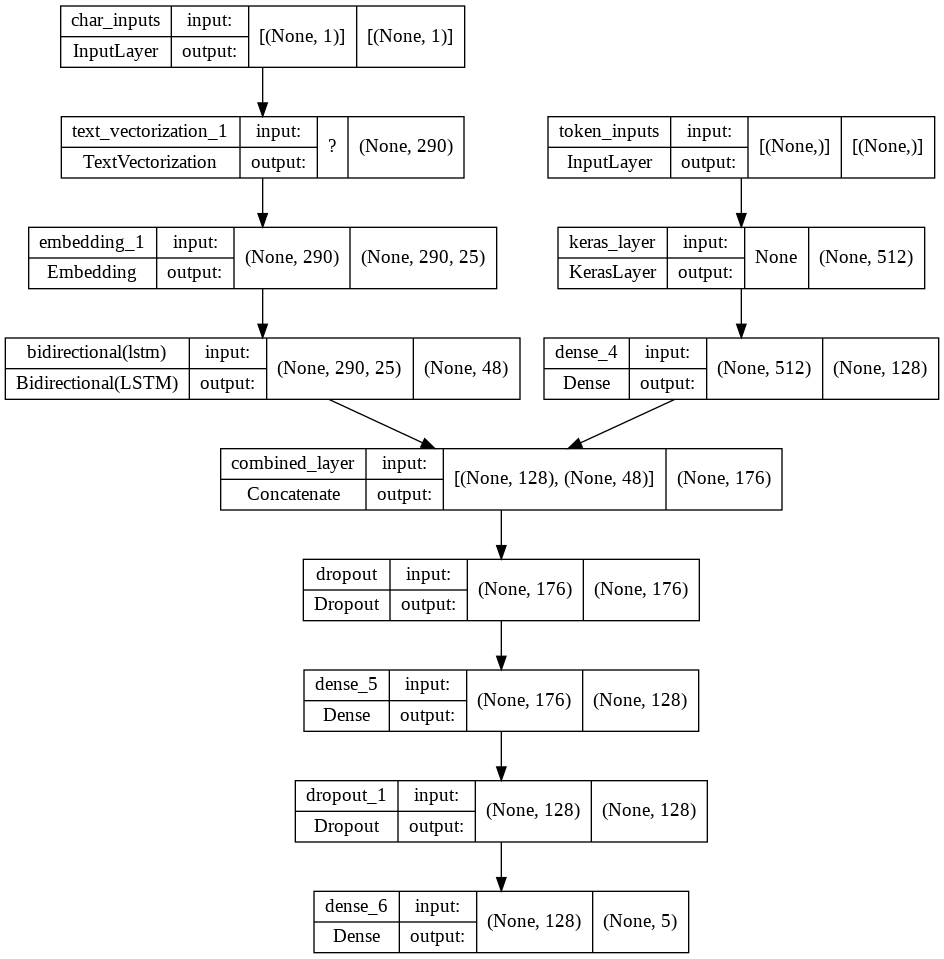

In [81]:
from tensorflow.keras.utils import plot_model
plot_model(model4, show_shapes = True)

In [82]:
model4.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam', 
               metrics = ['accuracy'])

In [83]:
# creating dataset for Model4

train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))

In [84]:
#creating val dataset for model4
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

In [85]:
#creating test dataset for model4
test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data, test_char_token_labels))

In [86]:
# prefetching 
train_char_token_dataset = train_char_token_dataset.batch(64).prefetch(tf.data.AUTOTUNE)
val_char_token_dataset = val_char_token_dataset.batch(64).prefetch(tf.data.AUTOTUNE)
test_char_token_dataset = test_char_token_dataset.batch(64).prefetch(tf.data.AUTOTUNE)


In [87]:
history4 = model4.fit(train_char_token_dataset, 
                    steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                    validation_steps=int(0.1 * len(val_char_token_dataset)),
                      epochs = 5,
                      validation_data = val_char_token_dataset, 
                      callbacks = [create_tensorboard_callback(tb_dir, 'model4_char_and_toke_embedding')])

Saving TensorBoard log files to: tb_dir/model4_char_and_toke_embedding/20220814-133951
Epoch 1/5
281/281 [==============================] - 35s 77ms/step - loss: 1.0382 - accuracy: 0.5834 - val_loss: 0.7846 - val_accuracy: 0.6935
Epoch 2/5
281/281 [==============================] - 18s 63ms/step - loss: 0.8197 - accuracy: 0.6844 - val_loss: 0.7339 - val_accuracy: 0.7201
Epoch 3/5
281/281 [==============================] - 14s 50ms/step - loss: 0.7622 - accuracy: 0.7096 - val_loss: 0.6967 - val_accuracy: 0.7304
Epoch 4/5
281/281 [==============================] - 13s 47ms/step - loss: 0.7323 - accuracy: 0.7219 - val_loss: 0.6637 - val_accuracy: 0.7447
Epoch 5/5
281/281 [==============================] - 13s 47ms/step - loss: 0.7328 - accuracy: 0.7244 - val_loss: 0.6513 - val_accuracy: 0.7487


In [88]:
model4.evaluate(val_char_token_dataset)


473/473 [==============================] - 17s 35ms/step - loss: 0.6551 - accuracy: 0.7502


[0.6550964117050171, 0.7501986026763916]

In [89]:
ypred4 = model4.predict(test_char_token_dataset)
ypred4 = tf.argmax(ypred4, axis = 1)
ypred4


<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 3, 2, ..., 4, 4, 1])>

In [90]:

# Calculate model_1 results
model4_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=ypred4)
scoresheet['Model4_char_and_token_embedding'] = model4_results
model4_results

{'accuracy': 74.31889829102373,
 'f1': 0.7386566940254692,
 'precision': 0.7434627192136023,
 'recall': 0.7431889829102373}

In [91]:
import pandas as pd

sco = pd.DataFrame(scoresheet)
sco.T

,accuracy,precision,recall,f1
naive_bayes (baseline),72.183238,0.718647,0.721832,0.698925
Model1 conv1d,80.633815,0.807798,0.806338,0.802883
Model2_USE_layer,67.536088,0.668125,0.675361,0.661996
Model3_char_level_embedding,52.175212,0.520140,0.521752,0.498878
Model4_char_and_token_embedding,74.318898,0.743463,0.743189,0.738657


## Model 5: (trial)

In [92]:
train_df.head()

,line_number,text,label,total_lines
0,1,To investigate the efficacy of @ weeks of dail...,OBJECTIVE,12
1,2,A total of @ patients with primary knee OA wer...,METHODS,12
2,3,Outcome measures included pain reduction and i...,METHODS,12
3,4,Pain was assessed using the visual analog pain...,METHODS,12
4,5,Secondary outcome measures included the Wester...,METHODS,12


In [93]:
train_df['rank'] = train_df['line_number']/train_df['total_lines']
val_df['rank'] = val_df['line_number']/val_df['total_lines']
test_df['rank'] = test_df['line_number']/test_df['total_lines']

In [94]:
train_ranks = train_df['rank'].to_numpy()
val_ranks = val_df['rank'].to_numpy()
test_ranks = test_df['rank'].to_numpy()

train_ranks

array([0.08333333, 0.16666667, 0.25      , ..., 0.83333333, 0.91666667,
       1.        ])

In [95]:
# creating dataset for Model4

train_model5a = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars, train_ranks))
train_model5a_dataset = tf.data.Dataset.zip((train_model5a, train_char_token_labels))

In [96]:
#creating val dataset for model4
val_model5a = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars, val_ranks))
val_model5a_dataset = tf.data.Dataset.zip((val_model5a, val_char_token_labels))

In [97]:
#creating test dataset for model4
test_model5a = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars, test_ranks))
test_model5a_dataset = tf.data.Dataset.zip((test_model5a, test_char_token_labels))

In [98]:
# prefetching 
train_model5a_dataset = train_model5a_dataset.batch(64).prefetch(tf.data.AUTOTUNE)
val_model5a_dataset = val_model5a_dataset.batch(64).prefetch(tf.data.AUTOTUNE)
test_model5a_dataset = test_model5a_dataset.batch(64).prefetch(tf.data.AUTOTUNE)


In [99]:
# step 1
token_inputs = layers.Input(shape = [], dtype = tf.string, name= 'token_inputs')
use_layer = use_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation = 'relu')(use_layer)

token_model = keras.Model(inputs = token_inputs, outputs = token_outputs)

# step 2
char_inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'char_inputs')
char_vector = char_vectorizer(char_inputs)
char_em = char_embed_layer(char_vector)
char_outputs = layers.Bidirectional(layers.LSTM(24))(char_em)

char_model = keras.Model(inputs = char_inputs, outputs = char_outputs)

# step 2a combining char and token outputs
char_token_combined_layer = layers.Concatenate()([token_model.output, char_model.output])
z = layers.Dropout(.4)(char_token_combined_layer)

# step 2b
rank_inputs = layers.Input(shape = (1,), name = 'rank')
rank_outputs = layers.Dense(1, activation = 'relu')(rank_inputs)

rank_model = keras.Model(inputs = rank_inputs, outputs = rank_outputs)

#step 3 char_token_output and rank_outputs
combined_layer = layers.Concatenate(name = 'combined_layer')([z, rank_model.output])

# step 4
x = layers.Dense(128, activation = 'relu')(combined_layer)
# x = layers.Dropout(.5)(x)
final_outputs = layers.Dense(5, activation = 'softmax')(x)

# step 5
model5a = keras.Model(inputs = [token_inputs, char_inputs, rank_inputs], outputs = final_outputs, 
                     name = 'model5a_hybrid_inputs')

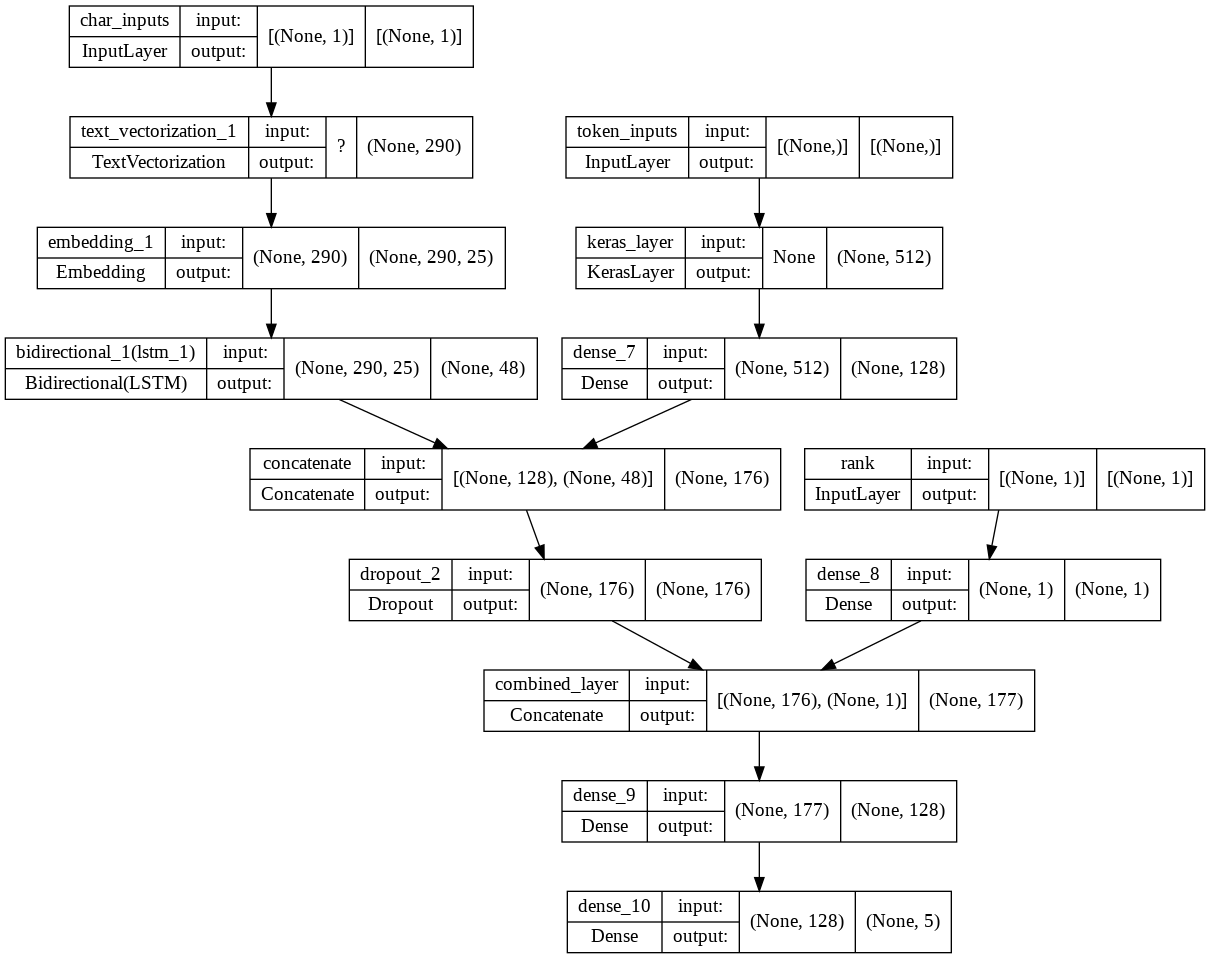

In [100]:
plot_model(model5a, show_shapes= True)

In [101]:
model5a.compile(loss = keras.losses.CategoricalCrossentropy(label_smoothing=.2),
               optimizer = 'adam', 
               metrics = ['accuracy'])

In [102]:
history5a = model5a.fit(train_model5a_dataset, 
                        steps_per_epoch=int(0.1 * len(train_model5a_dataset)),
                    validation_steps=int(0.1 * len(val_model5a_dataset)),
                      epochs = 5,
                      validation_data = val_model5a_dataset, 
                      callbacks = [create_tensorboard_callback(tb_dir, 'model5a_char_and_toke_embedding_and_rank_alpha')])

Saving TensorBoard log files to: tb_dir/model5a_char_and_toke_embedding_and_rank_alpha/20220814-134308
Epoch 1/5
281/281 [==============================] - 36s 86ms/step - loss: 1.1180 - accuracy: 0.7137 - val_loss: 0.9844 - val_accuracy: 0.8005
Epoch 2/5
281/281 [==============================] - 19s 67ms/step - loss: 0.9733 - accuracy: 0.8082 - val_loss: 0.9466 - val_accuracy: 0.8318
Epoch 3/5
281/281 [==============================] - 23s 82ms/step - loss: 0.9480 - accuracy: 0.8217 - val_loss: 0.9216 - val_accuracy: 0.8438
Epoch 4/5
281/281 [==============================] - 26s 91ms/step - loss: 0.9280 - accuracy: 0.8345 - val_loss: 0.9025 - val_accuracy: 0.8491
Epoch 5/5
281/281 [==============================] - 18s 62ms/step - loss: 0.9154 - accuracy: 0.8427 - val_loss: 0.8881 - val_accuracy: 0.8567


In [103]:
model5a.evaluate(val_model5a_dataset)


473/473 [==============================] - 22s 46ms/step - loss: 0.8893 - accuracy: 0.8568


[0.889347493648529, 0.8568118810653687]

In [104]:
ypred5a = model5a.predict(test_model5a_dataset)
ypred5a = tf.argmax(ypred5a, axis = 1)
ypred5a


<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 2, 2, ..., 4, 4, 1])>

In [105]:
# Calculate model_1 results
model5a_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=ypred5a)
scoresheet['Model5a_char_and_token_embedding_rank_alpha'] = model5a_results
model5a_results

{'accuracy': 85.103700016592,
 'f1': 0.8467857128954234,
 'precision': 0.8541098609487363,
 'recall': 0.85103700016592}

In [106]:
sco = pd.DataFrame(scoresheet)
sco.T

,accuracy,precision,recall,f1
naive_bayes (baseline),72.183238,0.718647,0.721832,0.698925
Model1 conv1d,80.633815,0.807798,0.806338,0.802883
Model2_USE_layer,67.536088,0.668125,0.675361,0.661996
Model3_char_level_embedding,52.175212,0.520140,0.521752,0.498878
Model4_char_and_token_embedding,74.318898,0.743463,0.743189,0.738657
Model5a_char_and_token_embedding_rank_alpha,85.103700,0.854110,0.851037,0.846786


## Model 5: (one hot encoding the RaNK)

### Create positional embeddings

Okay, enough talk about positional embeddings, let's create them.

Since our `"line_number"` and `"total_line"` columns are already numerical, we could pass them as they are to our model.

But to avoid our model thinking a line with `"line_number"=5` is five times greater than a line with `"line_number"=1`, we'll use one-hot-encoding to encode our `"line_number"` and `"total_lines"` features.

To do this, we can use the [`tf.one_hot`](https://www.tensorflow.org/api_docs/python/tf/one_hot) utility.

`tf.one_hot` returns a one-hot-encoded tensor. It accepts an array (or tensor) as input and the `depth` parameter determines the dimension of the returned tensor.

To figure out what we should set the `depth` parameter to, let's investigate the distribution of the `"line_number"` column.

> 🔑 **Note:** When it comes to one-hot-encoding our features, Scikit-Learn's [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) class is another viable option here.

In [107]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

1     15000
2     15000
3     15000
4     15000
5     14992
6     14949
7     14758
8     14279
9     13346
10    11981
11    10041
12     7892
13     5853
14     4152
15     2835
16     1861
17     1188
18      751
19      462
20      286
21      162
22      101
23       66
24       33
25       22
26       14
27        7
28        4
29        3
30        1
31        1
Name: line_number, dtype: int64

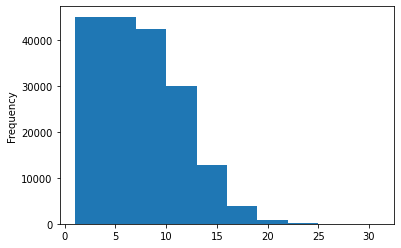

In [108]:
# Check the distribution of "line_number" column
train_df.line_number.plot.hist()

Looking at the distribution of the `"line_number"` column, it looks like the majority of lines have a position of 16 or less.

Knowing this, let's set the `depth` parameter of `tf.one_hot` to 15+1.

In [109]:
train_df['line'] = train_df['line_number'].apply(lambda x: x if x <16 else 16) # this will add all the line_numbers greater than 15 to 16 
val_df['line'] = val_df['line_number'].apply(lambda x: x if x <16 else 16) # this will add all the line_numbers greater than 15 to 16 
test_df['line'] = test_df['line_number'].apply(lambda x: x if x <16 else 16) # this will add all the line_numbers greater than 15 to 16 

In [110]:
train_df.sample(20)

,line_number,text,label,total_lines,rank,line
149029,8,Some therapeutic interventions were performed ...,RESULTS,11,0.727273,8
73469,4,Exclusion criteria for the pharmacokinetic stu...,METHODS,14,0.285714,4
77967,2,"This was a single-center , examiner-blind , ra...",METHODS,8,0.250000,2
80729,3,The aims of the present study were to assess t...,OBJECTIVE,10,0.300000,3
120178,5,Both groups were found to have experienced a s...,RESULTS,10,0.500000,5
85767,4,"HIV-infected , ART-naive pregnant women were e...",METHODS,13,0.307692,4
32528,13,HAL PDT shows a favorable efficacy and safety ...,CONCLUSIONS,13,1.000000,13
119507,6,The secondary outcome measures include eight i...,METHODS,10,0.600000,6
33770,1,To assess whether adding a fibrate to statin t...,OBJECTIVE,8,0.125000,1
69168,2,This study evaluated the efficacy of treatment...,BACKGROUND,12,0.166667,2


In [111]:
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column 
train_line_numbers_one_hot = tf.one_hot(train_df["line"].to_numpy(), depth=16)
val_line_numbers_one_hot = tf.one_hot(val_df["line"].to_numpy(), depth=16)
test_line_numbers_one_hot = tf.one_hot(test_df["line"].to_numpy(), depth=16)

In [112]:
# Check one-hot encoded "line_number" feature samples
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 16]), <tf.Tensor: shape=(20, 16), dtype=float32, numpy=
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0

We can do the same as we've done for our `"line_number"` column witht he `"total_lines"` column. First, let's find an appropriate value for the `depth` parameter of `tf.one_hot`.

In [113]:
# How many different numbers of lines are there?
train_df["total_lines"].value_counts()

12    24468
11    23639
13    22113
10    19400
14    18438
15    14610
9     12285
16    10768
8      7464
17     7429
18     5202
7      3353
19     3344
20     2480
21     1281
6      1146
22      770
23      759
24      264
5       215
25      200
26      182
27       81
29       58
4        32
31       31
28       28
Name: total_lines, dtype: int64

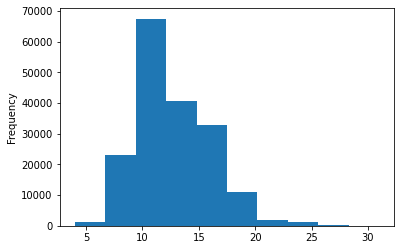

In [114]:
# Check the distribution of total lines
train_df.total_lines.plot.hist();

In [115]:
# Check the coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines, 98) # a value of 20 covers 98% of samples

21.0

In [116]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column 
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

In [153]:
# step 1
token_inputs = layers.Input(shape = [], dtype = tf.string, name= 'token_inputs')
use_layer = use_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation = 'relu')(use_layer)

token_model_5 = keras.Model(inputs = token_inputs, outputs = token_outputs)

# step 2
char_inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'char_inputs')
char_vector = char_vectorizer(char_inputs)
char_em = char_embed_layer(char_vector)
char_outputs = layers.Bidirectional(layers.LSTM(24))(char_em)

char_model = keras.Model(inputs = char_inputs, outputs = char_outputs)

# step 3 combining char and token outputs
char_token_combined_layer = layers.Concatenate()([token_model_5.output, char_model.output])
z = layers.Dense(128, activation = 'relu')(char_token_combined_layer)
z = layers.Dropout(.4)(z)

# step 4
line_num = layers.Input(shape = (16,),dtype = tf.float32, name = 'line_numbers')
line_num_outputs = layers.Dense(32, activation = 'relu')(line_num)

line_num_model = keras.Model(inputs = line_num, outputs = line_num_outputs)

# step 5
total_line_inputs = layers.Input(shape = (20,), dtype = tf.float32, name = 'total_line_numbers')
total_line_outputs = layers.Dense(32, activation = 'relu')(total_line_inputs)

total_line_model = keras.Model(inputs = total_line_inputs, outputs = total_line_outputs)

#step 6 char_token_output and rank_outputs
combined_layer = layers.Concatenate(name = 'combined_layer')([z, line_num_model.output, total_line_model.output])

# step 7
# x = layers.Dense(128, activation = 'relu')(combined_layer)
# x = layers.Dropout(.5)(x)
final_outputs = layers.Dense(5, activation = 'softmax')(combined_layer)

# step 8
model5 = keras.Model(inputs = [line_num_model.input, total_line_model.input, token_model_5.input, char_model.input], outputs = final_outputs, 
                     name = 'model5_hybrid_inputs')

In [154]:
token_model_5.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token_inputs (InputLayer)   [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_29 (Dense)            (None, 128)               65664     
                                                                 
Total params: 256,863,488
Trainable params: 65,664
Non-trainable params: 256,797,824
_________________________________________________________________


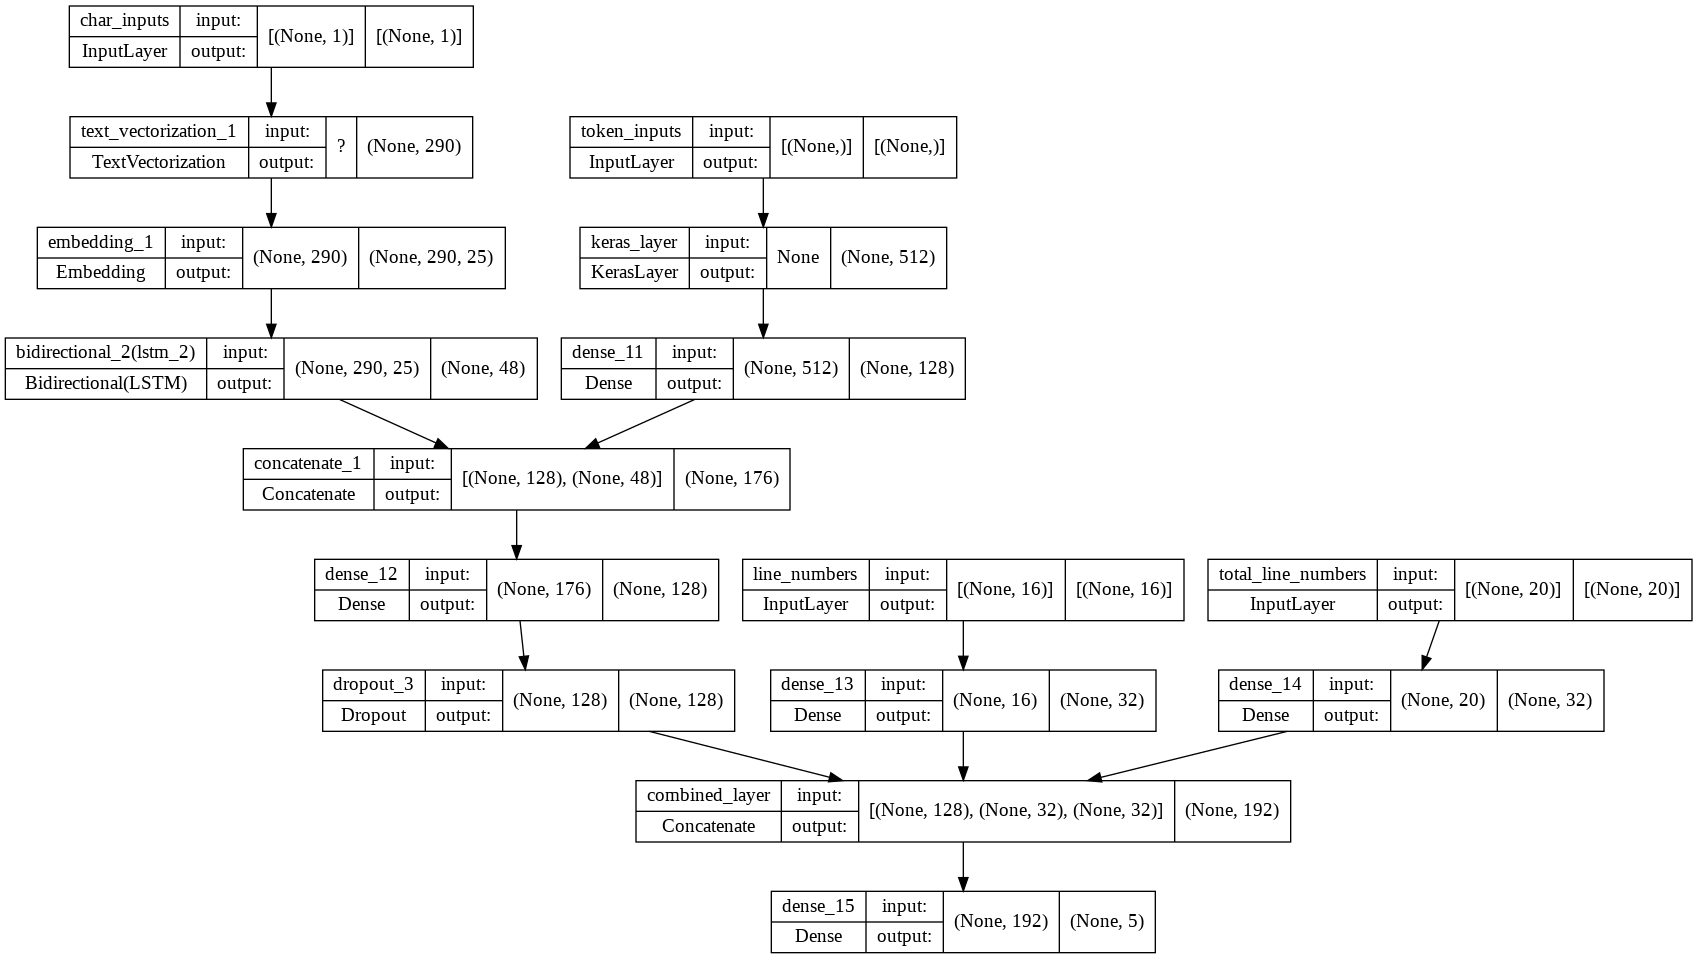

In [118]:
from tensorflow.keras.utils import plot_model
plot_model(model5, show_shapes= True)

In [119]:
model5.compile(loss = keras.losses.CategoricalCrossentropy(label_smoothing=.2),
               optimizer = 'adam', 
               metrics = ['accuracy'])

In [120]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Create test datasets (all four kinds of inputs)
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot, # line numbers
                                                               test_total_lines_one_hot, # total lines
                                                               test_sentences, # train tokens
                                                               test_chars)) # train chars
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot) # train labels
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels)) # combine data and labels
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.int32, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.int32, name=None))>)

In [121]:
history5 = model5.fit(train_pos_char_token_dataset, 
                          steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                    validation_steps=int(0.1 * len(val_pos_char_token_dataset)),
                # initial_epoch =5, # resume training from last epoch
                      epochs = 10,
                      validation_data = val_pos_char_token_dataset, 
                      callbacks = [create_tensorboard_callback(tb_dir, 'model5_char_and_toke_embedding_and_rank_one+hot')])

Saving TensorBoard log files to: tb_dir/model5_char_and_toke_embedding_and_rank_one+hot/20220814-134632
Epoch 1/10
562/562 [==============================] - 35s 47ms/step - loss: 1.1025 - accuracy: 0.7204 - val_loss: 0.9740 - val_accuracy: 0.8105
Epoch 2/10
562/562 [==============================] - 24s 43ms/step - loss: 0.9612 - accuracy: 0.8215 - val_loss: 0.9451 - val_accuracy: 0.8341
Epoch 3/10
562/562 [==============================] - 27s 47ms/step - loss: 0.9420 - accuracy: 0.8308 - val_loss: 0.9348 - val_accuracy: 0.8321
Epoch 4/10
562/562 [==============================] - 24s 43ms/step - loss: 0.9344 - accuracy: 0.8396 - val_loss: 0.9281 - val_accuracy: 0.8344
Epoch 5/10
562/562 [==============================] - 24s 43ms/step - loss: 0.9311 - accuracy: 0.8386 - val_loss: 0.9219 - val_accuracy: 0.8447
Epoch 6/10
562/562 [==============================] - 24s 43ms/step - loss: 0.9339 - accuracy: 0.8355 - val_loss: 0.9159 - val_accuracy: 0.8464
Epoch 7/10
562/562 [============

In [122]:
model5.evaluate(val_pos_char_token_dataset)


945/945 [==============================] - 22s 23ms/step - loss: 0.8968 - accuracy: 0.8575


[0.8967723846435547, 0.8575400710105896]

In [123]:
ypred5 = model5.predict(test_pos_char_token_dataset)
ypred5 = tf.argmax(ypred5, axis = 1)
ypred5


<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([3, 2, 2, ..., 4, 4, 1])>

In [124]:
# Calculate model_1 results
model5_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=ypred5)
scoresheet['Model5_char_and_token_embedding_rank_one_hot'] = model5_results
model5_results

{'accuracy': 85.37912726066035,
 'f1': 0.8510648760500084,
 'precision': 0.8531561709713564,
 'recall': 0.8537912726066036}

In [125]:
scor = pd.DataFrame(scoresheet)
scor.T

,accuracy,precision,recall,f1
naive_bayes (baseline),72.183238,0.718647,0.721832,0.698925
Model1 conv1d,80.633815,0.807798,0.806338,0.802883
Model2_USE_layer,67.536088,0.668125,0.675361,0.661996
Model3_char_level_embedding,52.175212,0.520140,0.521752,0.498878
Model4_char_and_token_embedding,74.318898,0.743463,0.743189,0.738657
Model5a_char_and_token_embedding_rank_alpha,85.103700,0.854110,0.851037,0.846786
Model5_char_and_token_embedding_rank_one_hot,85.379127,0.853156,0.853791,0.851065


## Model 5c with custom token embedding

In [149]:
# step 1
token_inputs = layers.Input(shape = [], dtype = tf.string, name= 'token_inputs')
vect_layer = text_vectorizer(token_inputs)
embed_layer = embed(vect_layer)
token_outputs = layers.Dense(128, activation = 'relu')(embed_layer)

token_model = keras.Model(inputs = token_inputs, outputs = token_outputs)

token_model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token_inputs (InputLayer)   [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 dense_22 (Dense)            (None, 55, 128)           16512     
                                                                 
Total params: 8,316,160
Trainable params: 8,316,160
Non-trainable params: 0
_________________________________________________________________


In [150]:
# step 2
char_inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'char_inputs')
char_vector = char_vectorizer(char_inputs)
char_em = char_embed_layer(char_vector)
char_outputs = layers.Bidirectional(layers.LSTM(24))(char_em)

char_model = keras.Model(inputs = char_inputs, outputs = char_outputs)

char_model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 char_inputs (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 290, 25)           2075      
                                                                 
 bidirectional_5 (Bidirectio  (None, 48)               9600      
 nal)                                                            
                                                                 
Total params: 11,675
Trainable params: 11,675
Non-trainable params: 0
_________________________________________________________________


In [155]:
# step 1
token_inputs = layers.Input(shape = [], dtype = tf.string, name= 'token_inputs')
vect_layer = text_vectorizer(token_inputs)
embed_layer = embed(vect_layer)
x = layers.GlobalMaxPool1D()(embed_layer)
token_outputs = layers.Dense(128, activation = 'relu')(x)

token_model = keras.Model(inputs = token_inputs, outputs = token_outputs)

# step 2
char_inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'char_inputs')
char_vector = char_vectorizer(char_inputs)
char_em = char_embed_layer(char_vector)
char_outputs = layers.Bidirectional(layers.LSTM(24))(char_em)

char_model = keras.Model(inputs = char_inputs, outputs = char_outputs)

# step 3 combining char and token outputs
char_token_combined_layer = layers.Concatenate()([token_model.output, char_model.output])
z = layers.Dense(128, activation = 'relu')(char_token_combined_layer)
z = layers.Dropout(.4)(z)

# step 4
line_num = layers.Input(shape = (16,),dtype = tf.float32, name = 'line_numbers')
line_num_outputs = layers.Dense(32, activation = 'relu')(line_num)

line_num_model = keras.Model(inputs = line_num, outputs = line_num_outputs)

# step 5
total_line_inputs = layers.Input(shape = (20,), dtype = tf.float32, name = 'total_line_numbers')
total_line_outputs = layers.Dense(32, activation = 'relu')(total_line_inputs)

total_line_model = keras.Model(inputs = total_line_inputs, outputs = total_line_outputs)

#step 6 char_token_output and rank_outputs
combined_layer = layers.Concatenate(name = 'combined_layer')([z, line_num_model.output, total_line_model.output])

# step 7
# x = layers.Dense(128, activation = 'relu')(combined_layer)
# x = layers.Dropout(.5)(x)
final_outputs = layers.Dense(5, activation = 'softmax')(combined_layer)

# step 8
model5c = keras.Model(inputs = [line_num_model.input, total_line_model.input, token_model.input, char_model.input], outputs = final_outputs, 
                     name = 'model5c_custom_text_embedding')

model5c.compile(loss = keras.losses.CategoricalCrossentropy(label_smoothing=.2),
               optimizer = 'adam', 
               metrics = ['accuracy'])

In [156]:
history5c = model5c.fit(train_pos_char_token_dataset, 
                          steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                    validation_steps=int(0.1 * len(val_pos_char_token_dataset)),
                # initial_epoch =5, # resume training from last epoch
                      epochs = 10,
                      validation_data = val_pos_char_token_dataset, 
                      callbacks = [create_tensorboard_callback(tb_dir, 'model5c_custom_text_embedding')])

Saving TensorBoard log files to: tb_dir/model5c_custom_text_embedding/20220814-142458
Epoch 1/10
562/562 [==============================] - 31s 40ms/step - loss: 1.0441 - accuracy: 0.7593 - val_loss: 0.9163 - val_accuracy: 0.8431
Epoch 2/10
562/562 [==============================] - 19s 34ms/step - loss: 0.9135 - accuracy: 0.8548 - val_loss: 0.9045 - val_accuracy: 0.8501
Epoch 3/10
562/562 [==============================] - 19s 34ms/step - loss: 0.8989 - accuracy: 0.8596 - val_loss: 0.8896 - val_accuracy: 0.8584
Epoch 4/10
562/562 [==============================] - 19s 34ms/step - loss: 0.8892 - accuracy: 0.8676 - val_loss: 0.8932 - val_accuracy: 0.8561
Epoch 5/10
562/562 [==============================] - 19s 34ms/step - loss: 0.8846 - accuracy: 0.8701 - val_loss: 0.8833 - val_accuracy: 0.8584
Epoch 6/10
562/562 [==============================] - 20s 36ms/step - loss: 0.9009 - accuracy: 0.8577 - val_loss: 0.8845 - val_accuracy: 0.8577
Epoch 7/10
562/562 [==============================

In [157]:
model5c.evaluate(val_pos_char_token_dataset)


945/945 [==============================] - 13s 14ms/step - loss: 0.8665 - accuracy: 0.8728


[0.8664901852607727, 0.8728320002555847]

In [158]:
ypred5c = model5c.predict(test_pos_char_token_dataset)
ypred5c = tf.argmax(ypred5c, axis = 1)
ypred5c


<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([3, 2, 2, ..., 4, 4, 1])>

In [159]:
# Calculate model_1 results
model5c_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=ypred5c)
scoresheet['Model5c_custom_text_embeddings'] = model5c_results
model5c_results

{'accuracy': 86.95204911232786,
 'f1': 0.866508239629066,
 'precision': 0.8709700414297046,
 'recall': 0.8695204911232786}

# Training on 200K dataset

In [126]:
# unzip train.zip located at 200k dataset folder
!unzip pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/train.zip 

Archive:  pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/train.zip
  inflating: train.txt               


Extracted 200k train dataset has been extracted to current working directory with `train.txt`.  We will rename it to `200k_train_dataset.txt`.

In [127]:
!mv train.txt 200k_train_dataset.txt
!ls

200k_train_dataset.txt	model.png  pubmed-rct  sample_data  tb_dir  train


In [128]:
#reading the file
read_file('200k_train_dataset.txt')

['###24491034\n',
 'BACKGROUND\tThe emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\n',
 'BACKGROUND\tThis paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .\n',
 'METHODS\tThis study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .\n',
 "METHODS\tThe intervention group will participate in the online group program ` Positive Outlook ' .\n",
 'METHODS\tThe program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .\n',
 'METHODS\tParticipants will access the program f

In [129]:
train_big = preprocess('200k_train_dataset.txt')

In [130]:
train_big_df = pd.DataFrame(train_big)
train_big_df.head()

,line_number,text,label,total_lines
0,1,The emergence of HIV as a chronic condition me...,BACKGROUND,11
1,2,This paper describes the design and evaluation...,BACKGROUND,11
2,3,This study is designed as a randomised control...,METHODS,11
3,4,The intervention group will participate in the...,METHODS,11
4,5,The program is based on self-efficacy theory a...,METHODS,11


In [131]:
#lets add label encoded column
big_labelencoder = LabelEncoder()

train_big_df['label_encoded'] = big_labelencoder.fit_transform(train_big_df.label)


In [132]:
train_big_df.sample(10)

,line_number,text,label,total_lines,label_encoded
1548790,8,The questionnaire and the visual analogue scal...,RESULTS,12,4
1934370,3,Investigators assessed the dietary adherence o...,METHODS,11,2
1115522,8,"In the Chinese herbal drug-treated group , cli...",RESULTS,13,4
838292,3,To investigate the efficacy of SLIT with grass...,OBJECTIVE,11,3
1152511,4,One hundred eighteen women completed the study .,RESULTS,11,4
612314,3,Symptomatic patients with ischemic heart failu...,RESULTS,6,4
448606,3,Rehabilitation unit of a neurological hospital...,METHODS,12,2
1094469,9,During follow-up ( median approximately @ mont...,RESULTS,16,4
1053285,9,The control group consisted of similar patient...,METHODS,15,2
633600,5,IGT was associated with impairment of verbal a...,RESULTS,9,4


In [133]:
# lets check some attributes of the dataframe
print('Shape ', train_big_df.shape )
train_big_df.info()

Shape  (2211861, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211861 entries, 0 to 2211860
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   line_number    int64 
 1   text           object
 2   label          object
 3   total_lines    int64 
 4   label_encoded  int64 
dtypes: int64(3), object(2)
memory usage: 84.4+ MB


In [134]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [135]:
# one hot encoding labels
big_ohe = OneHotEncoder(sparse = False, dtype = 'int32')

train_big_labels_one_hot = big_ohe.fit_transform(train_big_df["label"].to_numpy().reshape(-1, 1))


In [136]:
train_big_labels_one_hot.shape

(2211861, 5)

In [137]:
label_depth = train_big_df.label.nunique()
label_depth

5

In [138]:
# converting pandas series to numpy arrays
train_big_sentences = train_big_df.text.to_numpy()
train_big_line_number_one_hot = tf.one_hot(train_big_df.line_number.to_numpy(), depth = 16)
train_big_total_lines_one_hot = tf.one_hot(train_big_df.total_lines.to_numpy(), depth = 20)
train_big_chars = [word_split(i) for i in train_big_sentences]


In [139]:
# converting numpy arrays to tf.data.Dataset

train_big_pos_char_token = tf.data.Dataset.from_tensor_slices((train_big_line_number_one_hot, train_big_total_lines_one_hot, train_big_sentences, train_big_chars))
train_big_labels_data = tf.data.Dataset.from_tensor_slices(train_big_labels_one_hot)
train_big_dataset = tf.data.Dataset.zip((train_big_pos_char_token, train_big_labels_data))
train_big_dataset = train_big_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately



## Model 6 : Biggest Model 

In [140]:
# step 1
token_inputs = layers.Input(shape = [], dtype = tf.string, name= 'token_inputs')
use_layer = use_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation = 'relu')(use_layer)

token_model = keras.Model(inputs = token_inputs, outputs = token_outputs)

# step 2
char_inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'char_inputs')
char_vector = char_vectorizer(char_inputs)
char_em = char_embed_layer(char_vector)
char_outputs = layers.Bidirectional(layers.LSTM(24))(char_em)

char_model = keras.Model(inputs = char_inputs, outputs = char_outputs)

# step 3 combining char and token outputs
char_token_combined_layer = layers.Concatenate()([token_model.output, char_model.output])
z = layers.Dense(128, activation = 'relu')(char_token_combined_layer)
z = layers.Dropout(.4)(z)

# step 4
line_num = layers.Input(shape = (16,),dtype = tf.float32, name = 'line_numbers')
line_num_outputs = layers.Dense(32, activation = 'relu')(line_num)

line_num_model = keras.Model(inputs = line_num, outputs = line_num_outputs)

# step 5
total_line_inputs = layers.Input(shape = (20,), dtype = tf.float32, name = 'total_line_numbers')
total_line_outputs = layers.Dense(32, activation = 'relu')(total_line_inputs)

total_line_model = keras.Model(inputs = total_line_inputs, outputs = total_line_outputs)

#step 6 char_token_output and rank_outputs
combined_layer = layers.Concatenate(name = 'combined_layer')([z, line_num_model.output, total_line_model.output])

# step 7
# x = layers.Dense(128, activation = 'relu')(combined_layer)
# x = layers.Dropout(.5)(x)
final_outputs = layers.Dense(5, activation = 'softmax')(combined_layer)

# step 8
model6 = keras.Model(inputs = [line_num_model.input, total_line_model.input, token_model.input, char_model.input], outputs = final_outputs, 
                     name = 'model6')

In [141]:
model6.compile(loss = keras.losses.CategoricalCrossentropy(label_smoothing=.2),
               optimizer = 'adam', 
               metrics = ['accuracy'])

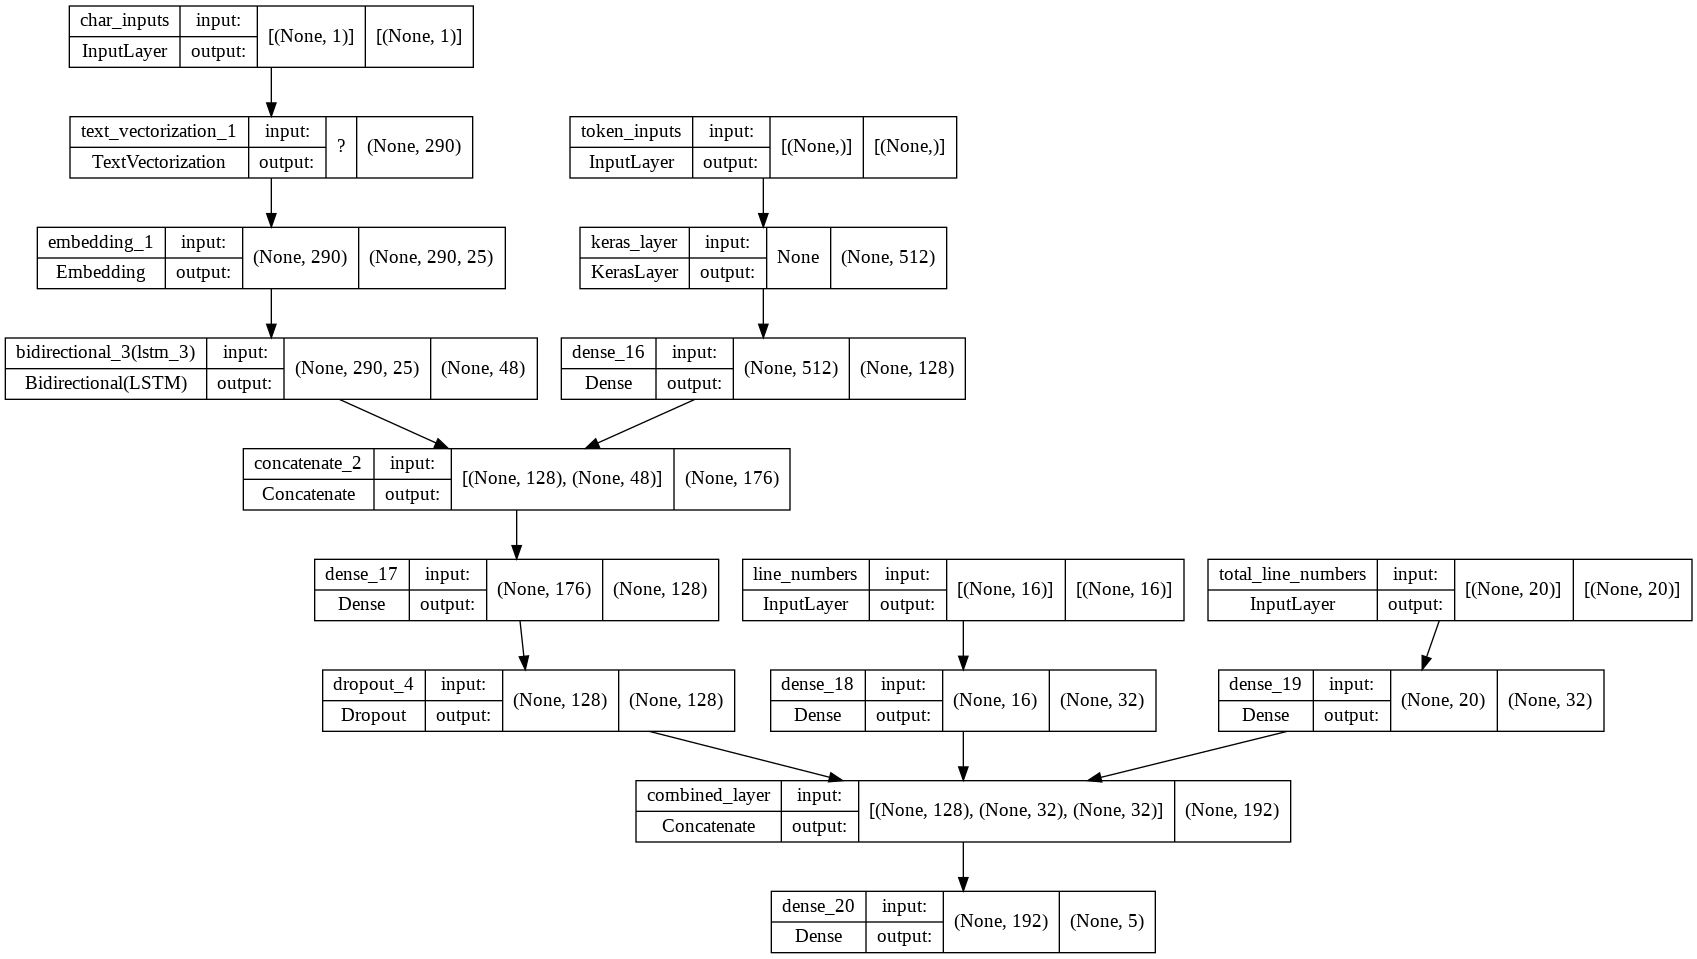

In [142]:
plot_model(model6 , show_shapes = True)

In [143]:
history6 = model6.fit(train_big_dataset, 
                          steps_per_epoch=int(0.1 * len(train_big_dataset)),
                    validation_steps=int(0.1 * len(val_pos_char_token_dataset)),
                # initial_epoch =5, # resume training from last epoch
                      epochs = 5,
                      validation_data = val_pos_char_token_dataset, 
                      callbacks = [create_tensorboard_callback(tb_dir, 'model6')])

Saving TensorBoard log files to: tb_dir/model6/20220814-135214
Epoch 1/5
6912/6912 [==============================] - 280s 39ms/step - loss: 0.9338 - accuracy: 0.8340 - val_loss: 0.9093 - val_accuracy: 0.8434
Epoch 2/5
6912/6912 [==============================] - 274s 40ms/step - loss: 0.8990 - accuracy: 0.8585 - val_loss: 0.8989 - val_accuracy: 0.8570
Epoch 3/5
6912/6912 [==============================] - 341s 49ms/step - loss: 0.8941 - accuracy: 0.8616 - val_loss: 0.8929 - val_accuracy: 0.8630
Epoch 4/5
6912/6912 [==============================] - 263s 38ms/step - loss: 0.8881 - accuracy: 0.8665 - val_loss: 0.8875 - val_accuracy: 0.8630
Epoch 5/5
6912/6912 [==============================] - 255s 37ms/step - loss: 0.8858 - accuracy: 0.8685 - val_loss: 0.8833 - val_accuracy: 0.8707


In [144]:
model6.evaluate(val_pos_char_token_dataset)


945/945 [==============================] - 21s 22ms/step - loss: 0.8759 - accuracy: 0.8717


[0.8759370446205139, 0.8717396855354309]

In [145]:
ypred6 = model6.predict(test_pos_char_token_dataset)
ypred6 = tf.argmax(ypred6, axis = 1)
ypred6

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 0, 2, ..., 4, 4, 1])>

In [146]:
# Calculate model_1 results
model6_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=ypred6)
scoresheet['Model6'] = model6_results
model6_results

{'accuracy': 87.17770034843205,
 'f1': 0.8692508494994676,
 'precision': 0.8706160555798947,
 'recall': 0.8717770034843205}

In [174]:
scor = pd.DataFrame(scoresheet)
scor = scor.T
scor['accuracy'] = scor['accuracy']/100
scor

,accuracy,precision,recall,f1
naive_bayes (baseline),0.721832,0.718647,0.721832,0.698925
Model1 conv1d,0.806338,0.807798,0.806338,0.802883
Model2_USE_layer,0.675361,0.668125,0.675361,0.661996
Model3_char_level_embedding,0.521752,0.520140,0.521752,0.498878
Model4_char_and_token_embedding,0.743189,0.743463,0.743189,0.738657
Model5a_char_and_token_embedding_rank_alpha,0.851037,0.854110,0.851037,0.846786
Model5_char_and_token_embedding_rank_one_hot,0.853791,0.853156,0.853791,0.851065
Model6,0.871777,0.870616,0.871777,0.869251
Model5c_custom_text_embeddings,0.869520,0.870970,0.869520,0.866508


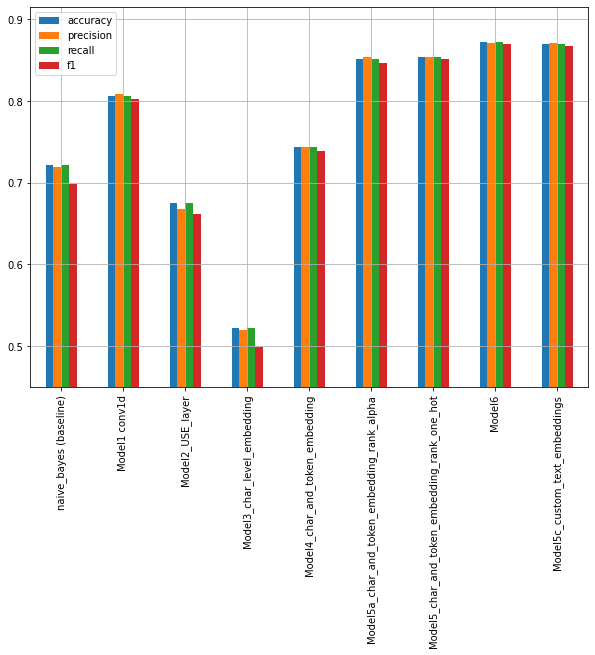

In [177]:
scor.plot(kind = 'bar', ylim =0.45, figsize = (10,7), grid = True)

# Conclusion

`model 6` which is trained on 200k dataset performed Best with 
* accuracy : 87.17%
* precision : 87.06% 
* recall :   87.17 
* f1-score :86.92% 


`model_5c_custom_text_embedding` which is trained on 200k dataset performed Best with 
* accuracy : 86.95%
* precision : 87.09% 
* recall :   86.95 
* f1-score :86.65% 

###Note: Though Model 6 wins Model5c_custom_text_embedding model is also better as it does not uses pretrained model (less in size) and the score difference is not that big.